In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Creación del Data Frame en pandas

In [3]:
df = pd.read_csv('alzheimers_disease_data.csv')

## Análisis exploratorio del dataset

Vemos que columnas podemos encontrar

In [4]:
for col in df.columns.tolist():
    print(col)

PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
FamilyHistoryAlzheimers
CardiovascularDisease
Diabetes
Depression
HeadInjury
Hypertension
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
MMSE
FunctionalAssessment
MemoryComplaints
BehavioralProblems
ADL
Confusion
Disorientation
PersonalityChanges
DifficultyCompletingTasks
Forgetfulness
Diagnosis
DoctorInCharge


# **Búsquda de correlaciones interesantes**

El dataset tiene varios datos que me parecen interesantes para investigar y correlacionar:

👉 Primero, en cuanto a condiciones generales que la persona no puede controlar, como edad, género, etnia, etc.
1. ¿Existe alguna relación entre la edad y la pérdida de memoria?
2. ¿Y entre la etnia y la pérdida de memoria?
3. ¿Estudiar más puede causar Alzheimer?

👉 En segundo lugar, factores de comportamiento que pueden afectar la probabilidad de generar alzheimer:
1. ¿Exite correlación entre el índice de masa corporal y AZ?
2. ¿Fumar aumenta las chances de generar una enfermedad neurodegenerativa?
3. ¿Y el consumo de alcohol?
4. ¿Hacer actividad física disminuye las chances?
5. ¿Cómo influye la dieta en el proceso neurodegenerativo?
6. ¿Qué rol juega la calidad del sueño?

👉 Finalmente, pero no menos importante, ¿qué papel juegan otras patologías en el diagnóstico del alzhaimer?
1. Correlaciones entre alzhaimer y la diabetes
2. Depresión y alzhaimer
3. Hipertensión, colesterol y enferemedades cardiovasculares relacionadas con el alzhaimer

## Limpieza de datos & visualización general del dataset

> Trato de responder esta pregunta: ¿Cómo está compuesto este dataset?

Vemos la media de edad en el grupo de pacientes estudiado.

In [8]:
age_group = np.array(df['Age'])

In [6]:
mean_age = age_group.mean()

print(f"La edad media de los pacientes es: {mean_age}")

La edad media de los pacientes es: 74.90879478827361


Graficamos las edades para ver si sigue una distribución normal.

In [19]:
bins = range(int(age_group.min()), int(age_group.max()) + 2)

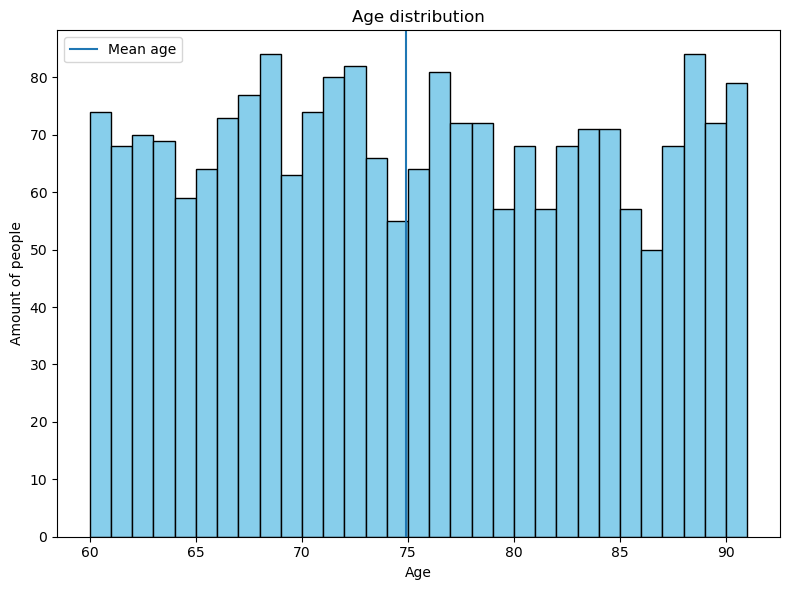

In [31]:
plt.figure(figsize=(8,6))
plt.hist(age_group, color='skyblue', edgecolor='black', bins=bins)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.axvline(mean_age, label='Mean age')
plt.legend()
plt.tight_layout()

In [33]:
df['Age'].describe()

count    2149.000000
mean       74.908795
std         8.990221
min        60.000000
25%        67.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64

- Podemos ver que se trata de un grupo etario de adultos mayores con una buena distribución de edades.
- La media y la mediana son similares, por lo que se trata de una **distribución estadística simétrica**
- La mayor parte de los datos se concentran en el intervalo de 67 a 83 años.

Ahora analizamos la distribución de géneros 


In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
1    1088
0    1061
Name: count, dtype: int64


Text(0.5, 1.0, 'Gender proportions')

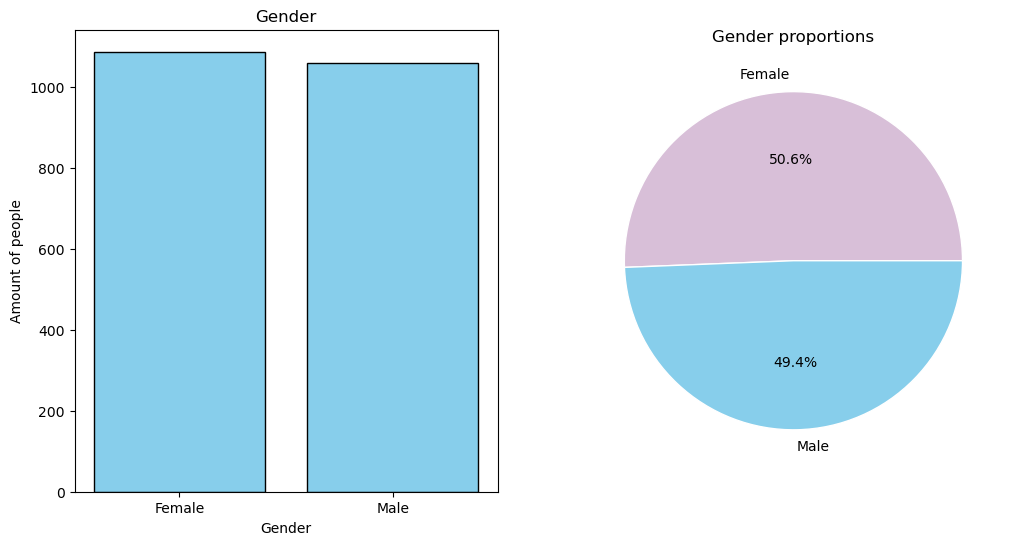

In [69]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['Female', 'Male'], gender_counts, color='skyblue', edgecolor='black')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Amount of people')

plt.subplot(122)
plt.pie(gender_counts, labels=['Female', 'Male'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Gender proportions')

Podemos observar también que la distribución de géneros es también muy equilibrada, teniendo prácticamente la misma proporción de hombres que de mujeres. 

Hacemos lo mismo con la etnia del grupo:

In [72]:
ethnic_count = df['Ethnicity'].value_counts()
ethnic_count

Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

Nota: 
- 0: Caucasian
- 1: African American
- 2: Asian
- 3: Other

Text(0.5, 1.0, 'Ethnic proportions')

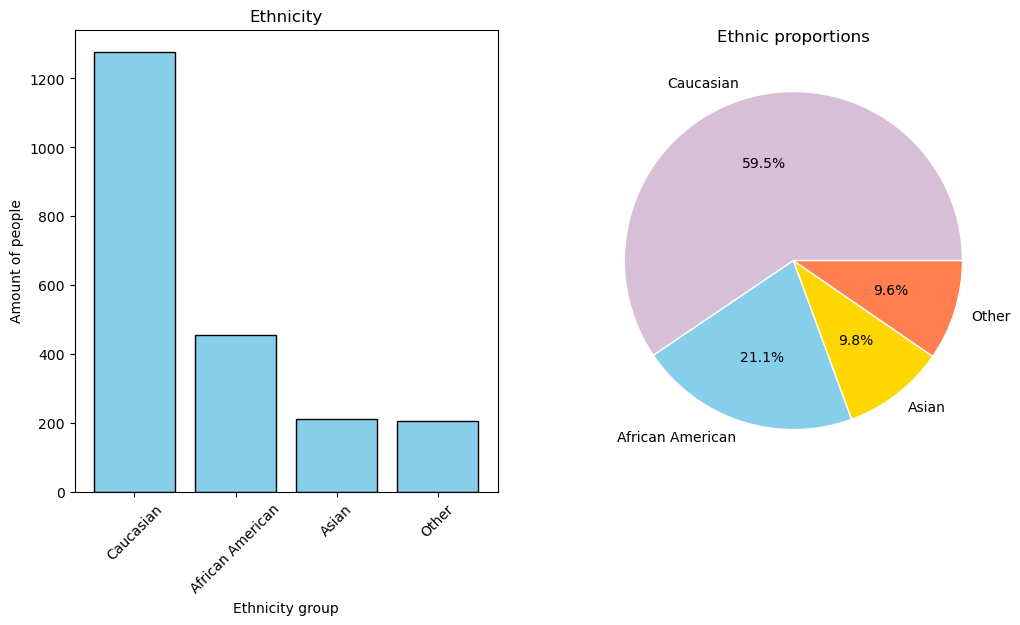

In [81]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['Caucasian', 'African American', 'Asian', 'Other'], ethnic_count, color='skyblue', edgecolor='black')
plt.title('Ethnicity')
plt.xlabel('Ethnicity group')
plt.ylabel('Amount of people')
plt.xticks(rotation=45)

plt.subplot(122)
plt.pie(ethnic_count, labels=['Caucasian', 'African American', 'Asian', 'Other'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue', 'gold', 'coral'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Ethnic proportions')

En este caso podemos ver que el grupo estudiado no es el más parejo ni abarcativo porque es muy desproporcionada la agrupación de grupos etnicos: tiene un enfoque predominantemente caucásico. 

Finalmente analizo cómo se compone educativamente el dataset.

In [80]:
education_groups = df['EducationLevel'].value_counts()

Nota:
- 0: None
- 1: High School
- 2: Bachelor's
- 3: Higher

Text(0.5, 1.0, 'Gender proportions')

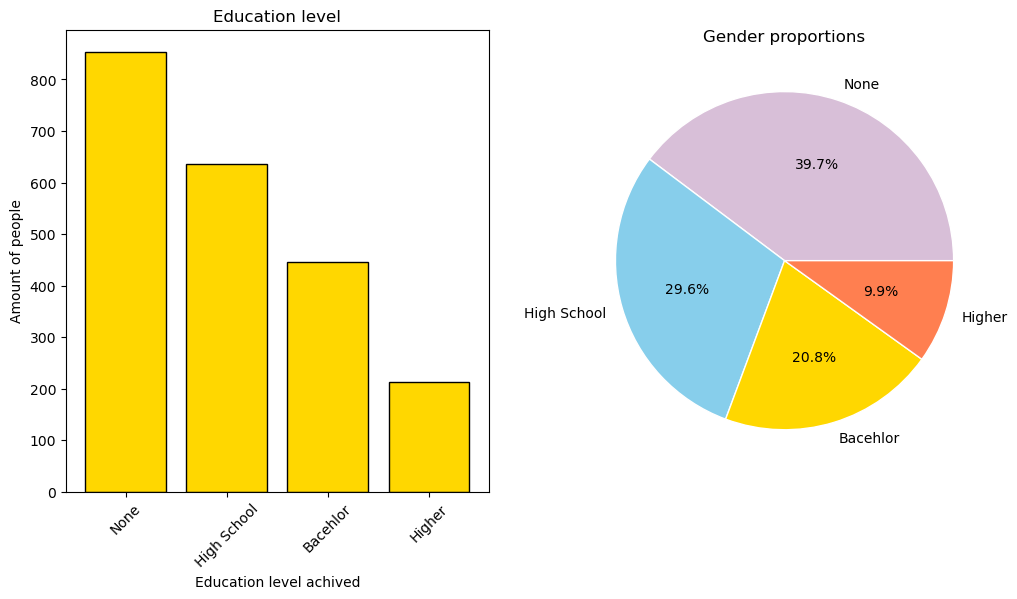

In [83]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(['None', 'High School', 'Bacehlor', 'Higher'], education_groups, color='gold', edgecolor='black')
plt.title('Education level')
plt.xlabel('Education level achived')
plt.ylabel('Amount of people')
plt.xticks(rotation=45)

plt.subplot(122)
plt.pie(education_groups, labels=['None', 'High School', 'Bacehlor', 'Higher'], 
        autopct='%1.1f%%', 
        colors=['thistle', 'skyblue', 'gold', 'coral'], 
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title('Gender proportions')

En este caso, podemos ver una desproporción en cuanto a la composición educativa del dataset. Sin embargo, si analizamos que la cantidad de personas sin estudios y con algún nivel educativo es similar.

Hasta ahora, a modo de resumen podemos concluir de éste dataset:
- Buena distribución de edades ✅
- Buena distribución de géneros ✅
- Distribución étnica poco pareja, dado que se enfoca en la étnia caucásica ⚠


---

## Buscando correlaciones entre los datos